In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [131]:
df = pd.read_csv('wines.csv')

In [132]:
df.head()

,rank,country,description,name,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [133]:
df['country'].unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China'], dtype=object)

In [134]:
df['variety'].unique()

array(['Portuguese Red', 'Pinot Gris', 'Riesling', 'Pinot Noir',
       'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Chardonnay', 'Malbec', 'Tempranillo Blend',
       'Meritage', 'Red Blend', 'White Blend', 'Merlot', "Nero d'Avola",
       'Chenin Blanc', 'Sauvignon Blanc', 'Viognier-Chardonnay',
       'Primitivo', 'Catarratto', 'Gamay', 'Inzolia', 'Petit Verdot',
       'Monica', 'Bordeaux-style White Blend', 'Grillo', 'Sangiovese',
       'Cabernet Franc', 'Champagne Blend', 'Bordeaux-style Red Blend',
       'Aglianico', 'Petite Sirah', 'Carmenère', 'Albariño',
       'Petit Manseng', 'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato',
       'Grüner Veltliner', 'Viognier', 'Vermentino', 'Grenache Blanc',
       'Syrah', 'Nebbiolo', 'Shiraz-Cabernet Sauvignon', 'Pinot Blanc',
       'Alsace white blend', 'Barbera', 'Rhône-style Red Blend',
       'Portuguese White', 'Graciano', 'Tannat-Cabernet', 'Sauvignon',
       'Torrontés', 'Prugnolo Gentile', 'G-

In [135]:
df['name'].count()

86197

In [136]:
df['points'].mean()

88.42188055383343

In [137]:
df['price'].max()

3300

In [138]:
df['price'].min()

4

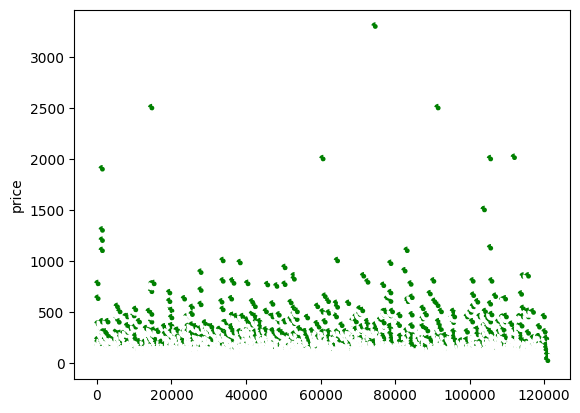

In [139]:
price = df['price']
sns.scatterplot(data=price)
sns.scatterplot(data=price, color='green', linestyle='--', linewidth=2.5)
plt.show()

## We can see from this graph that the overwheming majority of prices of wine is under $500 and there are some clear outliers which may cause some variation when doing statistical analysis, a histogram with the dataset as it is would have shown one giant line in the very first bin, making it hard to make an inference about the data's distribution

Text(0.5, 1.0, 'Average Points Histogram')

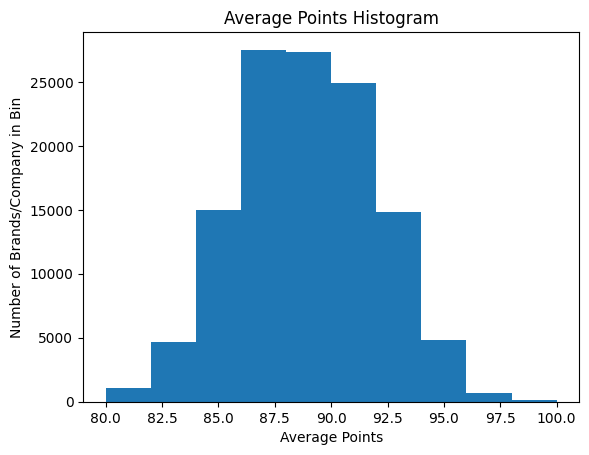

In [140]:
points = df['points']
plt.hist(points)
plt.xlabel('Average Points')
plt.ylabel("Number of Brands/Company in Bin")
plt.title('Average Points Histogram')

## From this histogram we can see that the distribution of points is in a normal distbution - bell-shaped which is what we are looking for

## Some data analysis

In [141]:
avg_points = df.groupby('country')['points'].mean()
avg_points

country
Argentina                 86.710330
Armenia                   87.500000
Australia                 88.595466
Austria                   90.190782
Bosnia and Herzegovina    86.500000
Brazil                    84.659574
Bulgaria                  87.936170
Canada                    89.377953
Chile                     86.495471
China                     89.000000
Croatia                   87.352113
Cyprus                    87.181818
Czech Republic            87.250000
England                   91.550725
France                    88.734867
Georgia                   87.678571
Germany                   89.836321
Greece                    87.288503
Hungary                   89.165517
India                     90.222222
Israel                    88.496933
Italy                     88.618186
Lebanon                   87.685714
Luxembourg                88.666667
Macedonia                 86.833333
Mexico                    85.257143
Moldova                   87.203390
Morocco             

In [142]:
highestavg = avg_points.idxmax()
highestavg

'England'

## England has the highest ratings by country which is suprising as most would have thought it would have been France or Italy or maybe even dozen or so other countries before England. Perhaps England does not appear a lot in the data. which can skew its ranking.

In [143]:
highestbyprovince = df.groupby('province')['price'].max()
highestbyprovince

province
Achaia                        37
Aconcagua Costa               95
Aconcagua Valley             235
Aegean                       120
Agioritikos                   25
                            ... 
Zenata                        18
Österreichischer Perlwein     21
Österreichischer Sekt         55
Štajerska                     31
Župa                          42
Name: price, Length: 422, dtype: int64

In [144]:
highestprovince = highestbyprovince.idxmax()
highestprovince

'Bordeaux'

## The highest rated wine-making province is Bordeaux, which is in France. Bordeaux is located in southeastern France and is on the coast of the Atlantic Ocean.

In [145]:
top10avgpoints = df.groupby('name')['points'].mean().nlargest(10)
top10avgpoints

name
Barca-Velha                            100.0
Cerretalto                             100.0
Cristal Vintage Brut                   100.0
Barca Velha                             99.0
Clos du Mesnil Brut Blanc de Blancs     99.0
Cuvée Constance 500ml                   99.0
Cà d'Morissio Riserva                   99.0
Elevation 1147 Estate                   99.0
Nacional Vintage                        99.0
Sorì Tildìn                             99.0
Name: points, dtype: float64

In [146]:
top_brandsvalue = df['variety'].value_counts().nlargest(10)
top_brandsvalue

variety
Pinot Noir                  12787
Chardonnay                  11080
Cabernet Sauvignon           9386
Red Blend                    8476
Bordeaux-style Red Blend     5340
Riesling                     4972
Sauvignon Blanc              4783
Syrah                        4086
Rosé                         3262
Merlot                       3062
Name: count, dtype: int64

In [147]:
df[df['variety']=='Pinot Noir']['price'].mean()

47.528896535543915

In [148]:
df.groupby('winery')['price'].mean().nlargest(10)

winery
Château les Ormes Sorbet         3300.000000
Château Pétrus                   2250.000000
Domaine du Comte Liger-Belair    1488.750000
Château Cheval Blanc              825.000000
Château d'Yquem                   800.000000
Masseto                           587.500000
Château Laville Haut-Brion        580.000000
Château Haut-Brion                571.700000
Château La Mission Haut-Brion     545.750000
Château Ausone                    506.666667
Name: price, dtype: float64

## Now for two graphs showing the mean price of wine and the mean points/ratings of selected countries. Most selected countries are known for their wine-making, although I did pick some countries like China to include all continents.

In [149]:
USA = df[df['country']=='US']['price'].mean()
FRA = df[df['country']=='France']['price'].mean()
ARG = df[df['country']=='Argentina']['price'].mean()
ITA = df[df['country']=='Italy']['price'].mean()
AUS = df[df['country']=='Australia']['price'].mean()
SPA = df[df['country']=='Spain']['price'].mean()
LEB = df[df['country']=='Lebanon']['price'].mean()
POR = df[df['country']=='Portugal']['price'].mean()
SAF = df[df['country']=='South Africa']['price'].mean()
CHN = df[df['country']=='China']['price'].mean()

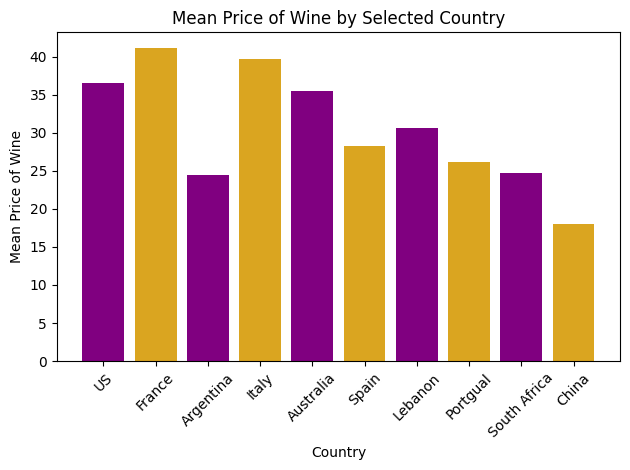

In [150]:
countries = ['US','France','Argentina','Italy','Australia','Spain','Lebanon','Portgual','South Africa','China']
mean_price = [USA,FRA,ARG,ITA,AUS,SPA,LEB,POR,SAF,CHN]
colors = ['purple', 'goldenrod']
color_indices = np.arange(len(countries)) % len(colors)
plt.bar(countries,mean_price, color=[colors[i] for i in color_indices])
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Mean Price of Wine')
plt.title('Mean Price of Wine by Selected Country')
plt.tight_layout()

## France and Italy are the top two countries when it comes to the mean price of wine

In [151]:
USA = df[df['country']=='US']['points'].mean()
FRA = df[df['country']=='France']['points'].mean()
ARG = df[df['country']=='Argentina']['points'].mean()
ITA = df[df['country']=='Italy']['points'].mean()
AUS = df[df['country']=='Australia']['points'].mean()
SPA = df[df['country']=='Spain']['points'].mean()
LEB = df[df['country']=='Lebanon']['points'].mean()
POR = df[df['country']=='Portugal']['points'].mean()
SAF = df[df['country']=='South Africa']['points'].mean()
CHN = df[df['country']=='China']['points'].mean()

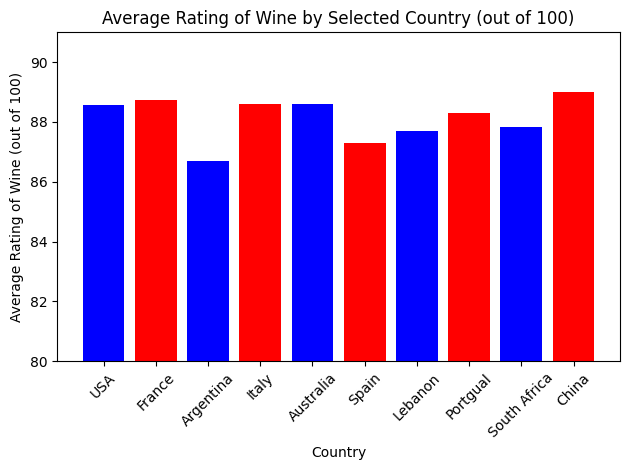

In [152]:
countries = countries = ['USA','France','Argentina','Italy','Australia','Spain','Lebanon','Portgual','South Africa','China']
points = [USA,FRA,ARG,ITA,AUS,SPA,LEB,POR,SAF,CHN]
colors = ['blue','red']
color_indices = np.arange(len(countries)) % len(colors)
plt.bar(countries,points, color=[colors[i] for i in color_indices])
plt.xticks(rotation=45)
plt.ylim(80, 91)
plt.xlabel('Country')
plt.ylabel('Average Rating of Wine (out of 100)')
plt.title('Average Rating of Wine by Selected Country (out of 100)')
plt.tight_layout()


## Here the average ratings are really not that far off from each other. The ratings are on a scale from 0-100, 100 being the highest. It really looks like the average rating of wine does not appear to effect the price of wine by much. As shown from the previous graph, China has the lowest mean price of wine out of the selected country, but at the same time has the highest average rating, that is very interesting to me.

## Next we will do some correlation and statistical analysis between the price of wine and the points/ratings of wine. The price will be the dependent variable and the points variable will be independent/predictor variable because what I think really matters to most to us is the price of wine really impacted by how high its ratings are.

In [153]:
x = df['points']
y = df['price']
correlation = x.corr(y)
correlation

0.4161667418606219

## A correlation of .41 shows a somewhat weak to moderate positive relationship between the price of wine and the ratings of wine, in other words, as the price of wine changes, 41% of the movement can be explained by changes in the ratings of wine, in the same direction. Meaning increases in ratings tend to bring increases in prices and vice versa for negative values. More statistical analysis will be done to further investigate the relationship between the two variables as correlation does not equal causation

In [154]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [155]:
model = LinearRegression()
model.fit(x,y)
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 2.534e+04
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        21:59:49   Log-Likelihood:            -6.0947e+05
No. Observations:              120975   AIC:                         1.219e+06
Df Residuals:                  120973   BIC:                         1.219e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -460.4624      3.117   -147.747      0.000    -466.571    -454.354
x1             5.6075      0.035    159.188      0.000       5.538       5.677
==============================================================================
Omnibus:                   276496.253   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6580756208.908
Skew:                          21.619   Prob(JB):                         0.00
Kurtosis:                    1144.785   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## After making a simple Linear Regression model the results showed a R-Squared of .173, p-value of less than .000 and an t-stat of -147.747, we can conclude that that only a very weak to almost no positive relationship between the price of wine and the rating of wine. Only 17.3% (R-Sqaured) of the variation in values of ratings of wine can be explained by variation in the changes in the price of wine, and with a p-value of a value under .000 and a t-stat of -147.747 we can also conclude that this result is also statistically significant. From what we can gather from the regression analysis and the correlation analysis, the ratings of wine do ever so smally impact the price of wine postively, however, it is clear there are other factors that figure into the price of wine, some which might not be able to be possible to capture from statistcial analysis such as the international prestige of a country or a province's wine making ability which can drive the price and ratings up or down or indvidual's personal preference of wine which may skew ratings as well. Or perhaps the outliers that I mentioned earlier might be causing more skew. Who know's what the answer is, but from these two variables we can conclude that they do not share a very strong relationship.